### 빅데이터 실습

#### 제주도 핫플레이스 웹크콜링

#### 셀레니움 사용

In [42]:
# 셀레니움 사용등록
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import unicodedata #유니코드 데이터 처리 모듈
import re # 정규식 처리 모듈
import time

In [15]:
driver = webdriver.Chrome()

##### 인스타그램 접속

In [21]:
# 인스타그램 접속
driver.get('https://www.instagram.com')
time.sleep(2.0)

##### 자동 로그인
- 로그인 화면, 아이디, 패스워드 입력하는 html name 속성이 생김

In [34]:
input_id = '' 
input_id = driver.find_element(By.NAME, 'username')
input_id.clear()
input_id.send_keys(email)

## 인스타그램 비밀번호 입력
password = ''
input_pw = driver.find_element(By.NAME, 'password')
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(2.0)

##### 태그로 검색하면 30개 이상 검색안됨
- 한 그룹의 게시물로 대체

In [36]:
## 검색결과 URL 함수
def searchInstagram(word):
  url = 'https://www.instagram.com/explore/tags/{word}'
  return url

In [37]:
driver.get(searchInstagram('제주도맛집'))

In [40]:
## 제주나드리 게시글로 검색
#https://www.instagram.com/jeju__nadri/
driver.get('https://www.instagram.com/jeju__nadri/')

##### 게시글 클릭 후 게시글 정보 가져오기

In [41]:
# 첫번째 게시글 클릭하는 함수
first = driver.find_elements(By.CLASS_NAME, '_aagw')[0]
first.click()
time.sleep(2.0)

In [43]:
## 게시글 정보 가져오기 함수
def getContent(driver):
  pass

<html class="_9dls js-focus-visible _aa4c wbloks_2" data-js-focus-visible="" dir="ltr" lang="ko"><head><link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" href="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" rel="icon" sizes="192x192"/><meta content="noarchive, noimageindex" name="robots"/><meta charset="utf-8"/><meta content="default" name="apple-mobile-web-app-status-bar-style"/><meta content="yes" name="mobile-web-app-capable"/><meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" id="viewport" name="viewport"/><link href="https://scontent-ssn1-1.cdninstagram.com" rel="preconnect"/><link href="https://scontent-ssn1-1.cdninstagram.com" rel="dns-prefetch"/><meta content="#FFFFFF" name="theme-color"/><meta content="#000000" media="(prefers-color-scheme: dark)" name="theme-color"/><link href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png" rel="apple-touch-icon
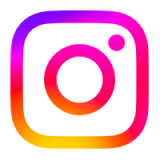
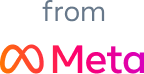

In [44]:
## 게시글 가져오기 로직
## 1. HTML코드 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

## 2. 팝업 본문내용 가져오기
content = soup.select()
